In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# Paso 1: Agrupar los stopword
# 1. Instalar librerías necesarias si aún no lo hiciste
!pip install -q pandas nltk

# 2. Importar librerías
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# 3. Cargar el CSV
df = pd.read_csv("DE_SPECS.csv")

# 4. Preparar stopwords
stop_words = set(stopwords.words('english'))

# Stopword extendidos
stop_words_extra = {
  'option','reduce','result','region','point','use','return','little','loss','pattern','enjoy','close','second','imagine',
  'none','tough','certain','question','win','word','south','raise','detail','rise','thus','listen','lose','determine','together',
  'decision','two','sing','play','early','left','discover','north','assume','run','many','follow','another','according','teach',
  'practice','senior','next','ok','become','ready','prove','relate','throw','fight','build','say','among','guess','prevent','effect',
  'catch','send','top','need','factor','per','offer','join','seem','something','easy','one','stand','difference','worry','type','fund',
  'simply','apply','fact','year','try','get','success','recognize','best','drop','break','protect','far','would','ten','Mr','meet','cause',
  'day','ahead','beyond','lay','similar','side','end','fill','act','wait','call','morning','first','produce','remember','minute','without',
  'cut','think','PM','still','clearly','often','yet','decade','actually','require','lead','never','perhaps','age','whose','speak','walk',
  'allow','right','billion','want','week','exist','involve','thing','today','final','push','several','recent','certainly','add','someone',
  'agree','us','discussion','spend','suffer','discuss','perform','suggest','claim','visit','else','since','bit','though','within','approach',
  'issue','quickly','may','month','appear','maybe','thousand','back','move','believe','describe','start','half','improve','along','wrong',
  'alone','reason','subject','outside','almost','situation','nothing','arrive','affect','difficult','away','much','decide','compare',
  'everybody','around','already','nearly','possible','identify','later','especially','hold','yeah','fall','consider','measure','indicate',
  'although','admit','less','particularly','middle','third','indeed','forward','mean','threat','eight','sometimes','southern','thank',
  'anything','majority','across','late','instead','remain','throughout','continue','sit','give','least','every','put','past','position',
  'respond','likely','despite','let','like','exactly','see','set','however','main','understand','stop','also','maintain','cover','reveal',
  'find','tonight','forget','usually','soon','provide','east','whether','everything','finish','avoid','represent','others','last','seven',
  'Mrs','somebody','term','show','accept','three','including','really','responsibility','sense','west','pull','finally','enter','happen',
  'step','occur','deal','hundred','smile','kind','everyone','leave','even','example','behind','open','either','state','range','six','yes',
  'go','serve','realize','ask','full','specific','true','begin','serious','probably','choose','include','know','feel','wear','explain',
  'live','group','free','central','debate','might','pass','stay','share','tell','attack','anyone','argue','tend','born','treat','ever',
  'country','expect','shake','increase','establish','future','number','five','must','whatever','suddenly','rather','quite','enough',
  'recently','ago','course'
}

# Unir conjuntos
stop_words.update(stop_words_extra)

# 5. Limpiar columna y convertir a minúsculas
df["Specs"] = df["Specs"].astype(str).str.strip().str.lower()

# 6. Clasificar: ¿es stopword o no?
df["Es_Stopword"] = df["Specs"].isin(stop_words)

# 7. Separar en dos DataFrames
df_stopwords = df[df["Es_Stopword"]].copy()
df_clean = df[~df["Es_Stopword"]].copy()

# 8. Asignar categoría 'StopWords' al grupo de stopwords
df_stopwords["Grupo"] = -1  # Para diferenciar
df_stopwords["Grupo_Specs"] = "StopWords"

# 9. Mostrar ejemplos
print("Ejemplos de stopwords detectadas:")
print(df_stopwords["Specs"].value_counts().head(20))

print("\nTotal de palabras útiles restantes:", df_clean.shape[0])

Ejemplos de stopwords detectadas:
Specs
of          1
option      1
reduce      1
recently    1
result      1
region      1
point       1
use         1
at          1
but         1
very        1
return      1
little      1
loss        1
born        1
tend        1
argue       1
anyone      1
attack      1
tell        1
Name: count, dtype: int64

Total de palabras útiles restantes: 524


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Paso 2: Categorizar los Specs válidos
# 1. Instalar librerías necesarias (si no las tienes)
!pip install -q pandas scikit-learn sentence-transformers matplotlib seaborn

# 2. Importar librerías
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# 3. Revisar datos
df_clean = df_clean.dropna(subset=["Specs"])  # Eliminar nulos en caso haya
df_clean["Specs"] = df_clean["Specs"].astype(str).str.lower().str.strip()
df_clean = df_clean.drop_duplicates(subset=["Specs"])
print("Cantidad de especificaciones únicas:", df_clean.shape[0])
df_clean.head()

Cantidad de especificaciones únicas: 524


,Specs,Und_Ven,Es_Stopword
0,thought,139,False
2,phone,55,False
3,travel,93,False
4,treatment,227,False
5,interesting,99,False


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)



Grupo 1:
['paper', 'woman', 'picture', 'art', 'author', 'rock', 'line', 'music', 'figure', 'model']

Grupo 2:
['edge', 'season', 'four', 'defense', 'choice', 'reach', 'onto', 'knowledge', 'carry', 'ability']

Grupo 3:
['mouth', 'piece', 'rich', 'daughter', 'huge', 'mother', 'boy', 'old', 'heart', 'character']

Grupo 4:
['bill', 'sort', 'service', 'standard', 'pay', 'list', 'people', 'condition', 'president', 'owner']

Grupo 5:
['article', 'world', 'language', 'audience', 'civil', 'election', 'section', 'popular', 'investment', 'administration']

Grupo 6:
['spring', 'house', 'wall', 'room', 'environment', 'city', 'town', 'bed', 'direction', 'road']

Grupo 7:
['concern', 'safe', 'note', 'wonder', 'beautiful', 'chance', 'way', 'peace', 'watch', 'notice']

Grupo 8:
['wide', 'skin', 'black', 'water', 'surface', 'light', 'gas', 'reflect', 'red', 'natural']

Grupo 9:
['court', 'radio', 'television', 'career', 'drug', 'education', 'teacher', 'office', 'health', 'scientist']

Grupo 10:
['gener

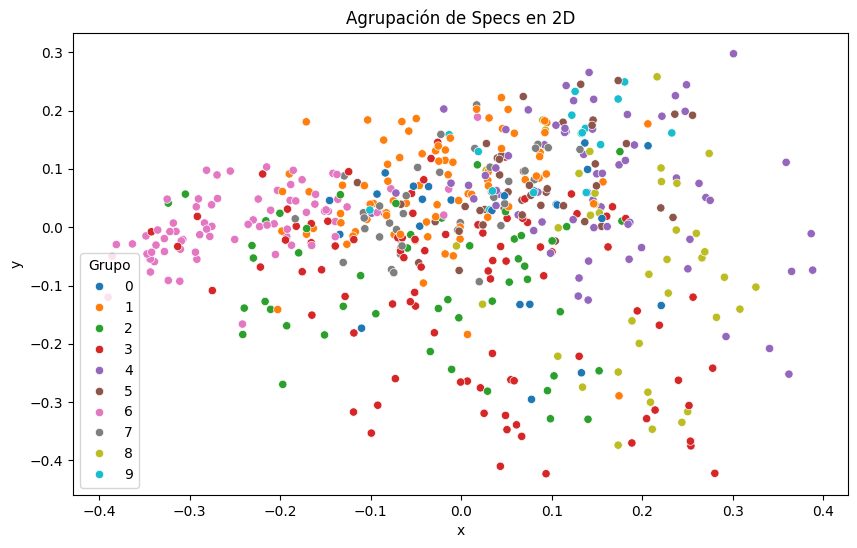

In [40]:
# 4. Generar embeddings usando Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')  # Modelo eficiente y rápido
embeddings = model.encode(df_clean["Specs"].tolist())

# 5. Agrupar usando KMeans en 10 grupos
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean["Grupo"] = kmeans.fit_predict(embeddings)

# 6. Ver resultados
for i in range(k):
    print(f"\nGrupo {i+1}:")
    print(df_clean[df_clean["Grupo"] == i]["Specs"].sample(10, random_state=1).tolist())

# 7. (Opcional) Visualizar con reducción a 2D
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(embeddings)
df_clean["x"] = components[:, 0]
df_clean["y"] = components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="x", y="y", hue="Grupo", palette="tab10")
plt.title("Agrupación de Specs en 2D")
plt.show()

In [41]:
# Combinar los datos nuevamente al final
df_final = pd.concat([df_clean, df_stopwords], ignore_index=True)

In [42]:
df_final

,Specs,Und_Ven,Es_Stopword,Grupo,x,y,Grupo_Specs
0,thought,139,False,6,-0.269284,0.049176,NaN
1,phone,55,False,3,0.073097,0.008237,NaN
2,travel,93,False,4,0.091815,0.141213,NaN
3,treatment,227,False,8,0.027436,0.097511,NaN
4,interesting,99,False,6,-0.283732,0.007213,NaN
...,...,...,...,...,...,...,...
965,five,98,True,-1,NaN,NaN,StopWords
966,must,12,True,-1,NaN,NaN,StopWords
967,whatever,27,True,-1,NaN,NaN,StopWords
968,suddenly,10,True,-1,NaN,NaN,StopWords


In [43]:
for i in sorted(df_final["Grupo"].unique()):
    print(f"\nGrupo {i}:")
    print(df_final[df_final["Grupo"] == i]["Specs"].value_counts().head(20))


Grupo -1:
Specs
of          1
option      1
reduce      1
recently    1
result      1
region      1
point       1
use         1
at          1
but         1
very        1
return      1
little      1
loss        1
born        1
tend        1
argue       1
anyone      1
attack      1
tell        1
Name: count, dtype: int64

Grupo 0:
Specs
page        1
voice       1
figure      1
picture     1
music       1
image       1
view        1
artist      1
camera      1
painting    1
line        1
writer      1
draw        1
paper       1
art         1
style       1
magazine    1
rock        1
woman       1
model       1
Name: count, dtype: int64

Grupo 1:
Specs
focus          1
trial          1
action         1
opportunity    1
contain        1
impact         1
effort         1
level          1
sound          1
answer         1
edge           1
turn           1
strong         1
attention      1
significant    1
skill          1
score          1
energy         1
test           1
performance    1

In [44]:
#Creando el df final con las categoría definidas
nombres_grupos = {
     0: "0: Sin valor temático",
     1: "1: Arte y creatividad",
     2: "2: Desarrollo personal",
     3: "3: Entorno familiar",
     4: "4: Entorno laboral",
     5: "5: Entorno social",
     6: "6: Hogar",
     7: "7: Gestión emocional",
     8: "8: Cuidado personal",
     9: "9: Instituciones",
     10: "10: Innovación"
}

# Crear nuevo DataFrame con columna Grupo incrementada en 1
dfs = df_final[['Specs', 'Grupo']].copy()
dfs['Grupo'] = dfs['Grupo'] + 1
dfs['Nombre_Grupo'] = dfs['Grupo'].map(nombres_grupos)

# Mostrar el resultado
print(dfs.head())

         Specs  Grupo          Nombre_Grupo
0      thought      7  7: Gestión emocional
1        phone      4    4: Entorno laboral
2       travel      5     5: Entorno social
3    treatment      9      9: Instituciones
4  interesting      7  7: Gestión emocional


In [45]:
#Crear dataframe a partir de nuestro dataset
df = pd.read_csv('T_PROD_VARS.csv', encoding='ISO-8859-1')
df.head(3)

,P_ID,P_Name,Category,Specs,Price,Nro_Ope,Edad_Prom,Flg_Hombre,Flg_Mujer,Per_VenL,Mes_Lanza,Prod_Rat,Flg_M5_post,Und_M6,Und_Ven,Afin_Hombre,Afin_Mujer,Edad_Pts,MesL_Pts
0,PD_21008237,Southern,Fashion,thought,426.07,8,54,1,1,202301,1,1.75,1,25,53,0.4980,0.4980,2,3
1,PD_21003606,Former,Home Appliance,option,388.44,7,34,1,1,202308,8,2.14,1,22,36,0.5274,0.5274,7,2
2,PD_21007384,Together,Electronics,phone,147.83,3,38,1,1,202306,6,2.67,1,15,24,0.4976,0.4976,4,2


In [46]:
#Agregar variable Grupo_Specs
df2 = df.merge(
    dfs,
    on='Specs',
    how='left'  # Para que conserve todos los productos, incluso si alguna Spec no tiene grupo
)

df2.rename(
    columns={
        'Grupo': 'Grupo_Specs',
        'Nombre_Grupo': 'Nom_Gru_Specs'
    },
    inplace=True
)

In [47]:
no_cruzaron = df2[df2['Grupo_Specs'].isna()]
print(f"Número de Specs sin grupo: {len(no_cruzaron)}")

Número de Specs sin grupo: 56


In [48]:
no_cruzaron['Specs'].unique()

array(['I', 'Mr', 'Democrat', 'PM', 'American', 'Republican', 'Congress',
       'TV', 'Mrs'], dtype=object)

In [49]:
#Asignar valores a los Specs que no cruzaron
# Diccionario
asignaciones = {
    'I':         {'Grupo_Specs': 0, 'Nom_Gru_Specs': '0: Sin valor temático'},
    'Mr':        {'Grupo_Specs': 0, 'Nom_Gru_Specs': '0: Sin valor temático'},
    'PM':        {'Grupo_Specs': 0, 'Nom_Gru_Specs': '0: Sin valor temático'},
    'Mrs':       {'Grupo_Specs': 0, 'Nom_Gru_Specs': '0: Sin valor temático'},
    'American':  {'Grupo_Specs': 5, 'Nom_Gru_Specs': '5: Entorno social'},
    'Democrat':  {'Grupo_Specs': 5, 'Nom_Gru_Specs': '5: Entorno social'},
    'Republican':{'Grupo_Specs': 5, 'Nom_Gru_Specs': '5: Entorno social'},
    'Congress':  {'Grupo_Specs': 5, 'Nom_Gru_Specs': '5: Entorno social'},
    'TV':  {'Grupo_Specs': 6, 'Nom_Gru_Specs': '6: Hogar'}
}


for spec, valores in asignaciones.items():
    df2.loc[df2['Specs'] == spec, 'Grupo_Specs'] = valores['Grupo_Specs']
    df2.loc[df2['Specs'] == spec, 'Nom_Gru_Specs'] = valores['Nom_Gru_Specs']

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6266 entries, 0 to 6265
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   P_ID           6266 non-null   object 
 1   P_Name         6260 non-null   object 
 2   Category       6266 non-null   object 
 3   Specs          6266 non-null   object 
 4   Price          6266 non-null   float64
 5   Nro_Ope        6266 non-null   int64  
 6   Edad_Prom      6266 non-null   int64  
 7   Flg_Hombre     6266 non-null   int64  
 8   Flg_Mujer      6266 non-null   int64  
 9   Per_VenL       6266 non-null   int64  
 10  Mes_Lanza      6266 non-null   int64  
 11  Prod_Rat       6266 non-null   float64
 12  Flg_M5_post    6266 non-null   int64  
 13  Und_M6         6266 non-null   int64  
 14  Und_Ven        6266 non-null   int64  
 15  Afin_Hombre    6266 non-null   float64
 16  Afin_Mujer     6266 non-null   float64
 17  Edad_Pts       6266 non-null   int64  
 18  MesL_Pts

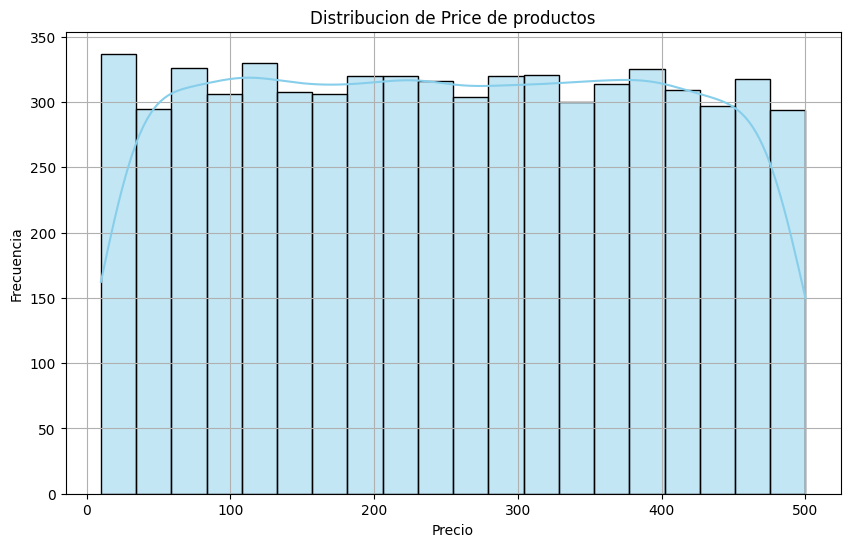

In [51]:
#EDA
plt.figure(figsize=(10, 6))
sns.histplot(df2['Price'], bins=20, kde=True, color='skyblue')

plt.title('Distribucion de Price de productos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [52]:
# 1. Definir límites de cada rango
bins = [10, 100, 200, 300, 400, float('inf')]
labels = ['De s/10 a s/100', 'De s/101 a s/200', 'De s/201 a s/300', 'De s/301 a s/400', 'De s/401 a s/500']

df2['Rango_Precio'] = pd.cut(df2['Price'], bins=bins, labels=labels, include_lowest=True)

# 2. Asignar un valor por cada rango
mapa_valores = {
    'De s/10 a s/100':1,
    'De s/101 a s/200':2,
    'De s/201 a s/300':3,
    'De s/301 a s/400':4,
    'De s/401 a s/500':5
}

df2['Val_Ran_Precio'] = df2['Rango_Precio'].map(mapa_valores).astype('Int64')

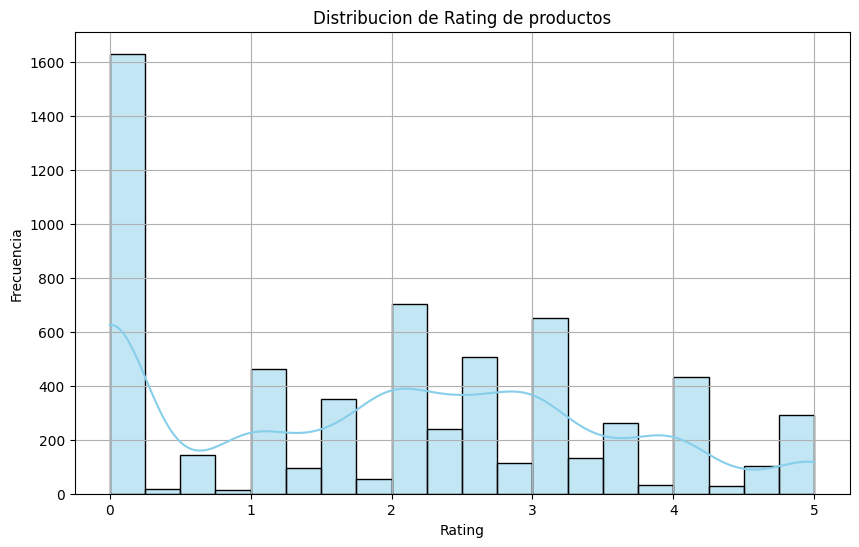

In [53]:
#EDA: Criterio 1
plt.figure(figsize=(10, 6))
sns.histplot(df2['Prod_Rat'], bins=20, kde=True, color='skyblue')

plt.title('Distribucion de Rating de productos')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

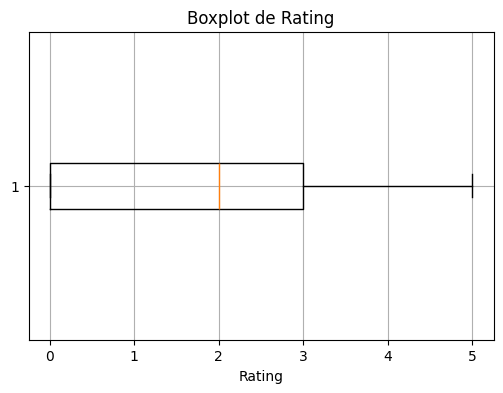

In [54]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['Prod_Rat'].dropna(), vert=False)
plt.title('Boxplot de Rating')
plt.xlabel('Rating')
plt.grid(True)
plt.show()

In [55]:
# Umbral = Cuartil 3
q3 = df2['Prod_Rat'].quantile(0.75)
print(f"Umbral Q3: {q3:.2f}")

df2['C1_Rat'] = (df2['Prod_Rat'] >= q3).astype(int)

Umbral Q3: 3.00


In [56]:
# Criterio 3
df2['C3_Ven'] = (df2['Und_M6'] / df2['Und_Ven'] >= 0.5).astype(int)

In [57]:
# Creación de la variable Objetivo
df2['Flag_Exito'] = ((df2['C1_Rat']==1) & (df2['Flg_M5_post']==1) & (df2['C3_Ven']==1)).astype(int)


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df2['Category'] = le.fit_transform(df2['Category'])

In [58]:
df2['Flag_Exito'] = ((df2['C3_Ven']==1)).astype(int)

In [59]:
df2.describe()

,Category,Price,Nro_Ope,Edad_Prom,Flg_Hombre,Flg_Mujer,Per_VenL,Mes_Lanza,Prod_Rat,Flg_M5_post,...,Und_Ven,Afin_Hombre,Afin_Mujer,Edad_Pts,MesL_Pts,Grupo_Specs,Val_Ran_Precio,C1_Rat,C3_Ven,Flag_Exito
count,6266.000000,6266.000000,6266.000000,6266.000000,6266.000000,6266.000000,6266.000000,6266.000000,6266.000000,6266.000000,...,6266.000000,6266.000000,6266.000000,6266.000000,6266.000000,6266.000000,6266.0,6266.000000,6266.000000,6266.000000
mean,2.015800,253.068479,2.180338,43.747846,0.629588,0.618417,202343.493616,5.989627,1.936214,0.178583,...,12.020268,0.320390,0.314284,3.907916,1.991701,2.624481,3.021226,0.308171,0.748643,0.748643
std,1.402167,141.097857,1.441170,13.346793,0.482954,0.485814,48.515949,3.453079,1.519289,0.383033,...,9.774737,0.246032,0.247146,1.963671,2.069023,3.030186,1.394561,0.461775,0.433828,0.433828
min,0.000000,10.000000,1.000000,18.000000,0.000000,0.000000,202301.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,-4.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,1.000000,130.332500,1.000000,34.000000,0.000000,0.000000,202305.000000,3.000000,0.000000,0.000000,...,5.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.0,0.000000,0.000000,0.000000
50%,2.000000,252.715000,2.000000,44.000000,1.000000,1.000000,202310.000000,6.000000,2.000000,0.000000,...,9.000000,0.497600,0.495400,4.000000,2.000000,2.000000,3.0,0.000000,1.000000,1.000000
75%,3.000000,375.845000,3.000000,54.000000,1.000000,1.000000,202404.000000,9.000000,3.000000,0.000000,...,16.000000,0.524800,0.498000,6.000000,3.000000,5.000000,4.0,1.000000,1.000000,1.000000
max,4.000000,499.970000,12.000000,70.000000,1.000000,1.000000,202412.000000,12.000000,5.000000,1.000000,...,78.000000,0.527400,0.527400,7.000000,6.000000,10.000000,5.0,1.000000,1.000000,1.000000


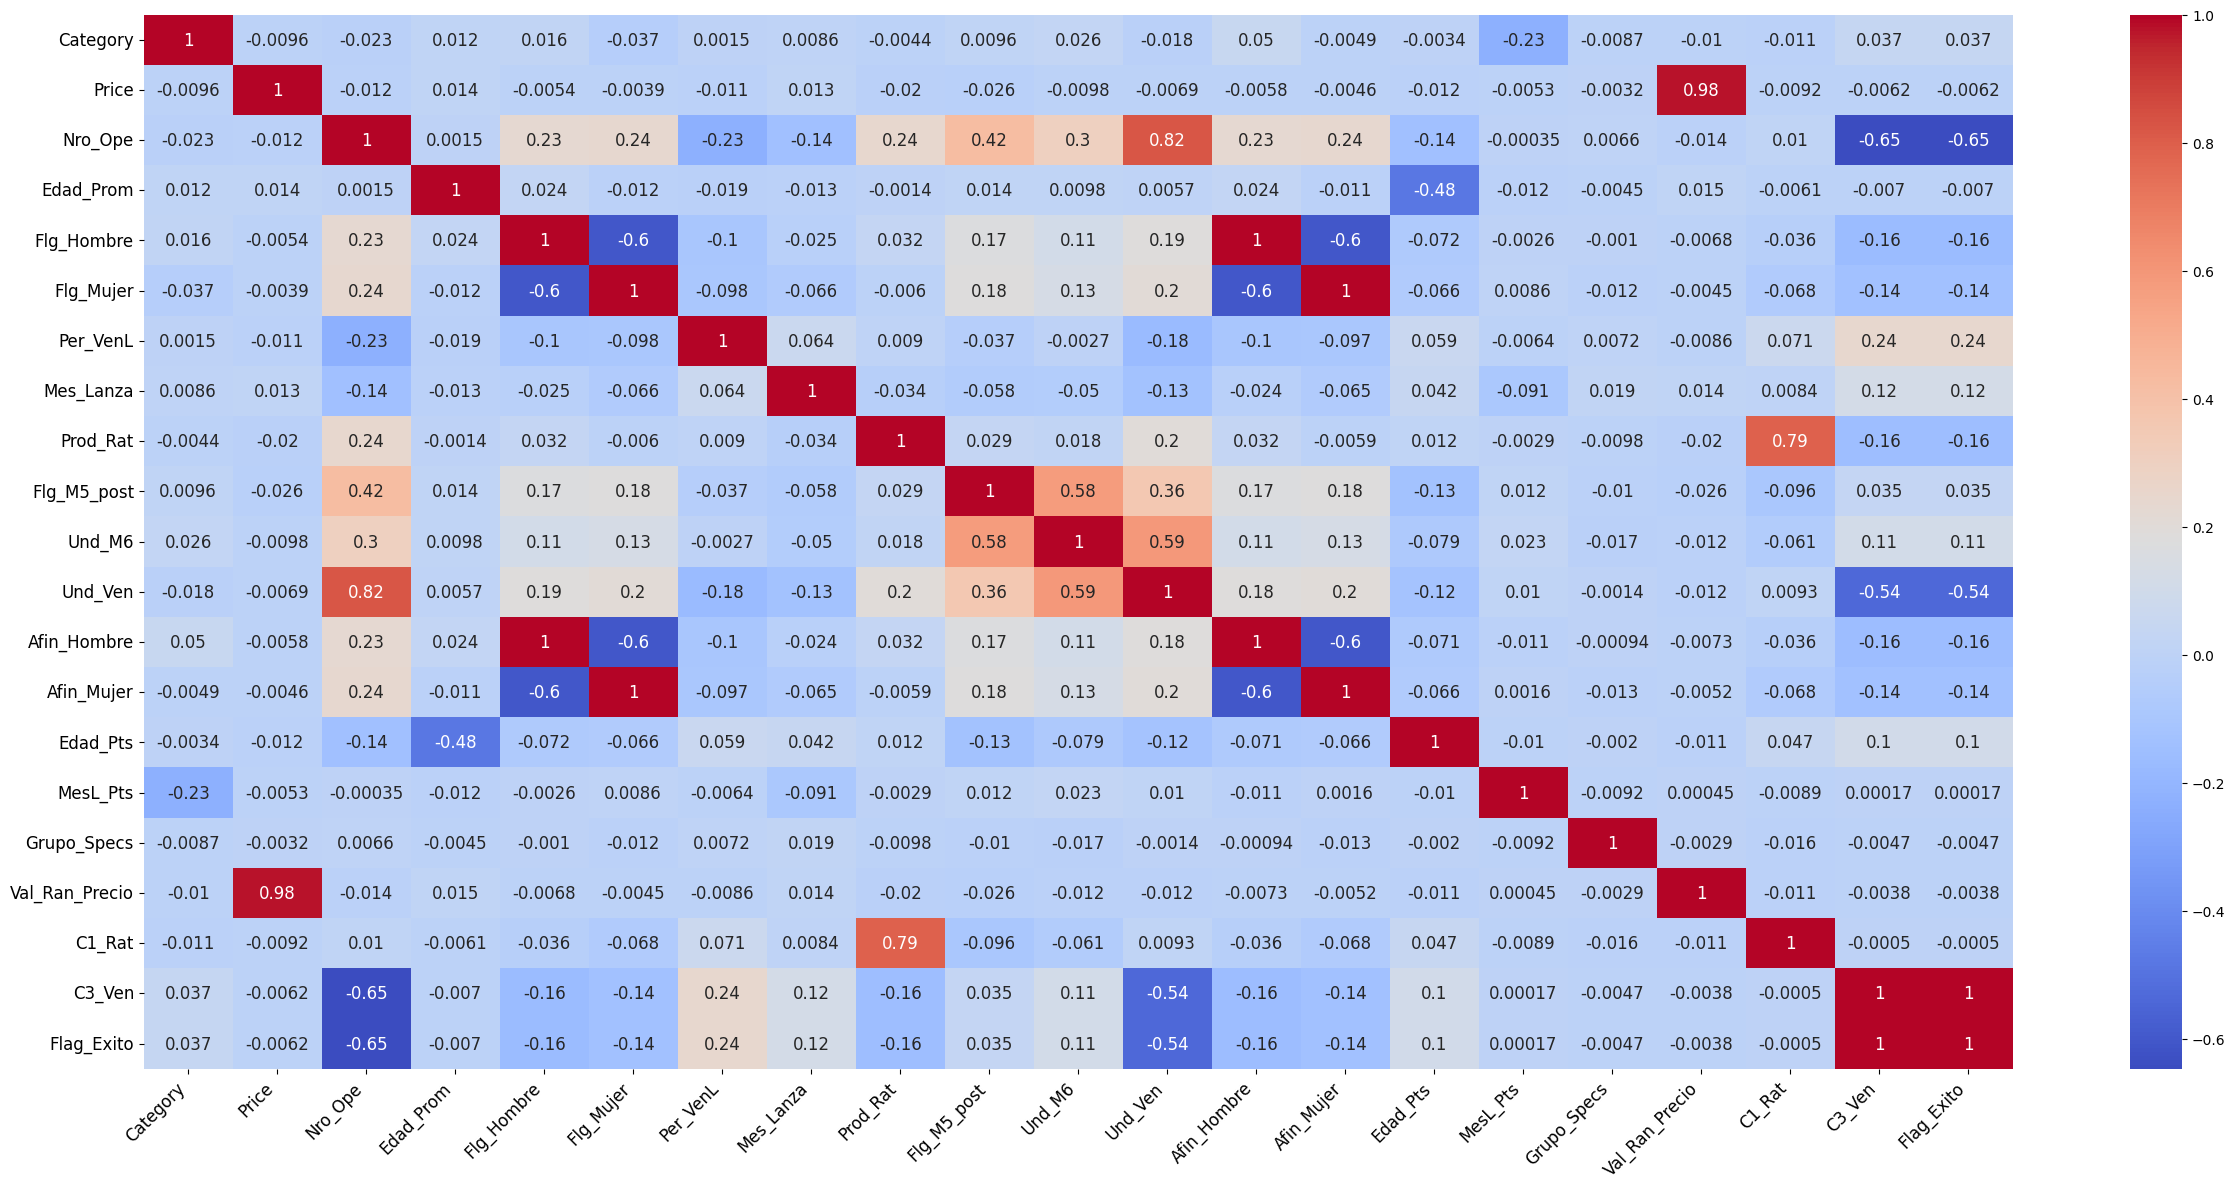

In [60]:
#====<MATRIZ DE CORRELACION >=====
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 12))  # Aumenta el ancho
sns.heatmap(df2.corr(numeric_only=True), cmap='coolwarm', annot=True, annot_kws={"size": 12})
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Para que no se corte nada
plt.show()


In [ ]:
#=============<MATRIZ DE CONFUSION>===============

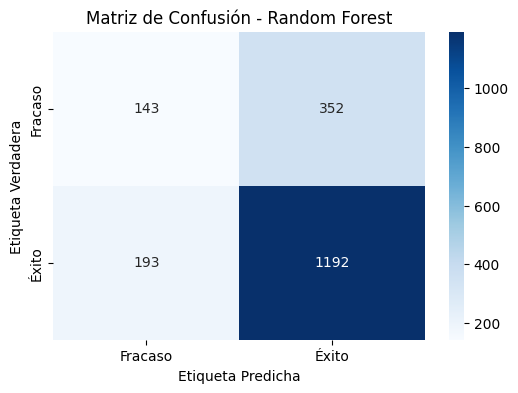

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Selección de características y target
X  = df2[['Afin_Hombre', 'Afin_Mujer', 'Edad_Pts','Val_Ran_Precio','Category', 'Grupo_Specs','MesL_Pts']]
y = df2['Flag_Exito']

# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Entrenamiento del modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Predicciones
y_pred = model.predict(X_test)

# 5. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# 6. Visualización con seaborn
labels = ['Fracaso', 'Éxito']
plt.figure(figsize=(6, 4))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)

ax.set_title('Matriz de Confusión - Random Forest')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Verdadera')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()


In [64]:
#========================<CLASFICACION>==========================
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

# Entradas y salidas
X  = df2[['Afin_Hombre', 'Afin_Mujer', 'Edad_Pts','Val_Ran_Precio','Category', 'Grupo_Specs','MesL_Pts']]
y = df2['Flag_Exito']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Diccionario de modelos
modelos = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Entrenar y guardar cada modelo
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    acc = accuracy_score(y_test, modelo.predict(X_test))
    print(f"{nombre}: Accuracy = {acc:.4f}")
    joblib.dump(modelo, f"modelo_{nombre}.pkl")


# K-Nearest Neighbors (KNN)
# Idea: Clasifica un punto según las clases más cercanas (vecinos).
# Ejemplo: Si 4 de tus 5 vecinos son "Exitosos", tú también lo serás.
# Ventaja: Simple, no necesita entrenamiento real.
# Desventaja: Lento si hay muchos datos. Sensible a escala de las variables.

# Support Vector Machine (SVM)
# Idea: Encuentra la frontera que mejor separa las clases (maximiza el margen).
# Ejemplo: Separa con una línea o curva los puntos "éxito" y "fracaso".
# Ventaja: Muy precisa en datasets pequeños y con clases separables.
# Desventaja: No funciona tan bien con mucho ruido o clases mezcladas.

# Random Forest
# Idea: Usa muchos árboles de decisión y promedia sus votos.
# Ejemplo: Si la mayoría de los árboles dicen “éxito”, el resultado es “éxito”.
# Ventaja: Muy robusto, maneja bien datos desbalanceados.
# Desventaja: Modelo pesado. Difícil de interpretar.

# Logistic Regression
# Idea: Predice la probabilidad de que algo pertenezca a una clase.
# Ejemplo: “Hay 92% de probabilidad que este producto sea exitoso”.
# Ventaja: Muy rápida, fácil de interpretar.
# Desventaja: Solo modela relaciones lineales.

# Decision Tree
# Idea: Clasifica haciendo preguntas tipo “¿rating > 4.5?”, etc.
# Ejemplo: Como un diagrama de decisiones: sí/no en cada nodo.
# Ventaja: Muy interpretable, se puede visualizar.
# Desventaja: Se sobreajusta fácilmente (overfitting).


# Gradient Boosting
# Idea: Construye modelos débiles en secuencia, cada uno corrigiendo al anterior.
# Ejemplo: Primer modelo falla, segundo se enfoca en esos errores, y así.
# Ventaja: Muy potente, funciona bien en competiciones.
# Desventaja: Lento de entrenar, sensible a ruido si no se ajusta bien.

KNN: Accuracy = 0.7043
SVM: Accuracy = 0.7500
RandomForest: Accuracy = 0.7234
LogisticRegression: Accuracy = 0.7500
DecisionTree: Accuracy = 0.6713
GradientBoosting: Accuracy = 0.7543


In [65]:
!pip install -q mlflow
!pip install -q pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.6/680.6 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.0/120.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.6/201.6 kB 11.7 MB/s eta 0:00:00


In [66]:
df2.to_csv('mi_archivo.csv', index=False)

In [68]:
# === TUS IMPORTACIONES EXISTENTES ===
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

# === NUEVO: IMPORTAR MLFLOW ===
import mlflow
import mlflow.sklearn

# === TUS ENTRADAS Y SALIDAS ===
X  = df2[['Afin_Hombre', 'Afin_Mujer', 'Edad_Pts','Val_Ran_Precio','Category', 'Grupo_Specs','MesL_Pts']]
y = df2['Flag_Exito']

# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Diccionario de modelos
modelos = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True),
    "RandomForest": RandomForestClassifier(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "GradientBoosting": GradientBoostingClassifier()
}

# Establecer experimento
mlflow.set_experiment("Clasificacion_MisModelos_df2")

run_ids = {}  # Para guardar los ID de cada modelo

# Entrenar, evaluar, registrar en MLflow y guardar localmente
for nombre, modelo in modelos.items():
    with mlflow.start_run(run_name=nombre) as run:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        print(f"{nombre}: Accuracy = {acc:.4f}")

        # Registrar métrica y modelo en MLflow
        mlflow.log_metric("accuracy", acc)
        mlflow.sklearn.log_model(modelo, nombre.lower() + "_model")

        # Guardar .pkl localmente como ya haces
        joblib.dump(modelo, f"modelo_{nombre}.pkl")

        run_ids[nombre] = run.info.run_id  # Guardar ID si luego deseas cargarlo

2025/08/02 05:27:12 INFO mlflow.tracking.fluent: Experiment with name 'Clasificacion_MisModelos_df2' does not exist. Creating a new experiment.
2025/08/02 05:27:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


KNN: Accuracy = 0.7043


2025/08/02 05:27:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/02 05:27:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


SVM: Accuracy = 0.7500


2025/08/02 05:27:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/02 05:27:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForest: Accuracy = 0.7234


2025/08/02 05:27:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/02 05:27:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


LogisticRegression: Accuracy = 0.7500


2025/08/02 05:27:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/02 05:27:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


DecisionTree: Accuracy = 0.6628


2025/08/02 05:27:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/08/02 05:27:46 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


GradientBoosting: Accuracy = 0.7543


2025/08/02 05:27:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
# Lanza MLflow UI en segundo plano (si estás en Colab)
get_ipython().system_raw("mlflow ui --port 5000 &")

from pyngrok import ngrok
ngrok.set_auth_token("30er7Arrb1oLQWz95QM7rGVohP2_6Uf1yiTgXMDuoTpCE2Hjn")
public_url = ngrok.connect(5000)
print("🔗 MLflow UI:", public_url)